In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os
os.getcwd()

'/Users/miek/Documents/DS4B/DS4BThesisSNCB'

In [2]:
# read in data
punct2019_1 = pd.read_csv("./data/Punctuality_2019_part1.csv", sep = ";")
punct2019_2 = pd.read_csv("./data/Punctuality_2019_part2.csv", sep = ";")
punct2020_1 = pd.read_csv("./data/Punctuality_2020_part1.csv", sep = ";")
punct2020_2 = pd.read_csv("./data/Punctuality_2020_part2.csv", sep = ";")
punct2021_1 = pd.read_csv("./data/Punctuality_2021_part1.csv", sep = ";")
punct2021_2 = pd.read_csv("./data/Punctuality_2021_part2.csv", sep = ";")
punct2022_1 = pd.read_csv("./data/Punctuality_2022_part1.csv", sep = ";")
punct2022_2 = pd.read_csv("./data/Punctuality_2022_part2.csv", sep = ";")
punct2023 = pd.read_csv("./data/Punctuality_2023.csv", sep = ";")

# combine
all_punct = pd.concat([punct2019_1, punct2019_2, punct2020_1, punct2020_2, punct2021_1, punct2021_2, punct2022_1, punct2022_2, punct2023], axis = 0)

# create year var
all_punct['DAT_DEP'] = pd.to_datetime(all_punct['DAT_DEP'])
all_punct['YEAR_DEP'] = all_punct['DAT_DEP'].apply(lambda x: x.year)

all_punct.tail(20)

/var/folders/xh/tvsq17cn5c5f3xr3pqpf29_r0000gn/T/ipykernel_35019/2822747563.py:16: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  all_punct['DAT_DEP'] = pd.to_datetime(all_punct['DAT_DEP'])


,TRAIN_ID,DAT_DEP,Retard_1pointage,PTCAR_1pointage,Retard_2pointage,PTCAR_2pointage,NAT_RGE,TRAIN_NUMBER,Retard_1pointage_valeur,Retard_2pointage_valeur,Validite_1pointage,Validite_2pointage,NB,Score,ScorePonctu,YEAR_DEP
310394,31972502.0,2023-02-08,-25.0,733.0,NaN,NaN,,5483.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0
310395,31972835.0,2023-02-08,107.0,936.0,NaN,NaN,,7650.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0
310396,31973301.0,2023-02-08,8.0,458.0,NaN,NaN,,8975.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0
310397,31975200.0,2023-02-08,157.0,982.0,NaN,NaN,,4689.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0
310398,31975401.0,2023-02-08,279.0,1195.0,NaN,NaN,,5370.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0
310399,31971027.0,2023-02-08,207.0,37.0,158.0,220.0,,1961.0,1.0,1.0,1.0,1.0,2.0,2.0,100.0,2023.0
310400,31971286.0,2023-02-08,92.0,984.0,8.0,221.0,,1731.0,1.0,1.0,1.0,1.0,2.0,2.0,100.0,2023.0
310401,31971852.0,2023-02-08,51.0,259.0,NaN,NaN,,4036.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0
310402,31972021.0,2023-02-08,-88.0,848.0,NaN,NaN,,4491.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0
310403,31972331.0,2023-02-08,105.0,1106.0,NaN,NaN,,5918.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0


## EDA on routes delays and routes

In [3]:
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(all_punct.describe())


       TRAIN_ID                        DAT_DEP  Retard_1pointage   
count   4752011                        4752011           4751973  \
mean   27394721  2021-02-19 21:43:25.564424704               119   
min    22622175            2019-01-01 00:00:00            -86337   
25%    24862010            2020-01-19 00:00:00                -9   
50%    27249030            2021-02-25 00:00:00                43   
75%    29917850            2022-03-15 00:00:00               140   
max    32345550            2023-04-12 00:00:00             30138   
std     2849321                            NaN               311   

       PTCAR_1pointage  Retard_2pointage  PTCAR_2pointage  TRAIN_NUMBER   
count          4751973            868460           868460       4752011  \
mean               584               118              221          4193   
min                  6            -86716              215            23   
25%                221               -14              220          2265   
50%         

In [192]:
len(pd.unique(all_punct['TRAIN_ID']))

4752012

In [193]:
len(pd.unique(all_punct['TRAIN_NUMBER']))

4664

In [194]:
all_punct.dtypes

TRAIN_ID                          float64
DAT_DEP                    datetime64[ns]
Retard_1pointage                  float64
PTCAR_1pointage                   float64
Retard_2pointage                  float64
PTCAR_2pointage                   float64
NAT_RGE                            object
TRAIN_NUMBER                      float64
Retard_1pointage_valeur           float64
Retard_2pointage_valeur           float64
Validite_1pointage                float64
Validite_2pointage                float64
NB                                float64
Score                             float64
ScorePonctu                       float64
YEAR_DEP                          float64
dtype: object

In [5]:
subset1 = all_punct[all_punct['NB'] == 1]
cat1 = subset1.rename(columns={"Retard_1pointage": "delay_of_interest"})
cat1['category'] = 1
cat1 = cat1[['YEAR_DEP', 'delay_of_interest', 'category', 'NB', 'TRAIN_NUMBER', 'ScorePonctu']]

subset2 = all_punct[all_punct['NB'] == 2]
cat2 = subset2.rename(columns={"Retard_1pointage": "delay_of_interest"})
cat2['category'] = 2
cat2 = cat2[['YEAR_DEP', 'delay_of_interest', 'category', 'NB', 'TRAIN_NUMBER', 'ScorePonctu']]

cat3 = subset2.rename(columns={"Retard_2pointage": "delay_of_interest"})
cat3['category'] = 3
cat3 = cat3[['YEAR_DEP', 'delay_of_interest', 'category', 'NB', 'TRAIN_NUMBER', 'ScorePonctu']]

all_cat = pd.concat([cat1, cat2, cat3])


In [196]:
all_cat.head()

,YEAR_DEP,delay_of_interest,category,NB,TRAIN_NUMBER,ScorePonctu
0,2019.0,72.0,1,1.0,5689.0,100.0
1,2019.0,63.0,1,1.0,5685.0,100.0
2,2019.0,-17.0,1,1.0,6389.0,100.0
3,2019.0,122.0,1,1.0,5683.0,100.0
4,2019.0,101.0,1,1.0,5692.0,100.0


In [197]:
all_cat.dtypes

YEAR_DEP             float64
delay_of_interest    float64
category               int64
NB                   float64
TRAIN_NUMBER         float64
ScorePonctu          float64
dtype: object

In [190]:
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(all_cat.describe())


       YEAR_DEP  delay_of_interest  category      NB  TRAIN_NUMBER  \
count   3908965            3908965   3908965 3908965       3908965   
mean       2021                155         1       1          3965   
std           1                171         1       0          2804   
min        2019                  1         1       1            23   
25%        2020                 37         1       1          2206   
50%        2021                 89         1       1          3612   
75%        2022                205         2       2          5060   
max        2023                875         3       2         19999   

       ScorePonctu  
count      3908965  
mean            88  
std             31  
min              0  
25%            100  
50%            100  
75%            100  
max            100  


In [5]:
# we are only interested in delays, not early trains -> remove negative delays
all_cat = all_cat[all_cat['delay_of_interest'] > 0]

#calculate interquartile range 
q3, q1 = np.percentile(all_cat['delay_of_interest'], [75 ,25])
iqr = q3 - q1
print(iqr)
max_allowed = np.median(all_cat['delay_of_interest']) + 3 * iqr
print(max_allowed)



168.0
593.0


In [4]:
# we are only interested in delays, not early trains -> remove negative delays
all_cat = all_cat[all_cat['delay_of_interest'] > 0]

# calculate max allowed value for each year and category
grouped = all_cat.groupby(['YEAR_DEP', 'category'])
q3 = grouped['delay_of_interest'].quantile(0.75)
q1 = grouped['delay_of_interest'].quantile(0.25)
iqr = q3 - q1
max_allowed = q3 + 3 * iqr

# replace outliers with max allowed value for each group
for name, group in grouped:
    year, category = name
    max_allowed_val = max_allowed.loc[(year, category)]
    all_cat.loc[(all_cat['YEAR_DEP'] == year) & (all_cat['category'] == category) & (all_cat['delay_of_interest'] > max_allowed_val), 'delay_of_interest'] = max_allowed_val

# plot violinplot
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(18, 12))
sns.violinplot(x='YEAR_DEP', y='delay_of_interest', data=all_cat,
               hue='category', palette={1: 'lightblue', 2: 'orange', 3: 'orange'},
               ax=ax, cut=0)

NameError: name 'all_cat' is not defined

In [201]:
pd.unique(all_punct['NAT_RGE'])

array([' ', nan], dtype=object)

In [5]:
all_punct.tail()

,TRAIN_ID,DAT_DEP,Retard_1pointage,PTCAR_1pointage,Retard_2pointage,PTCAR_2pointage,NAT_RGE,TRAIN_NUMBER,Retard_1pointage_valeur,Retard_2pointage_valeur,Validite_1pointage,Validite_2pointage,NB,Score,ScorePonctu,YEAR_DEP
310409,31975122.0,2023-02-08,124.0,1106.0,NaN,NaN,,5818.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0
310410,31975221.0,2023-02-08,262.0,726.0,NaN,NaN,,5331.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0
310411,31975392.0,2023-02-08,-12.0,726.0,NaN,NaN,,5337.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0
310412,31975680.0,2023-02-08,-44.0,210.0,NaN,NaN,,829.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0
310413,31971036.0,2023-02-08,-73.0,221.0,NaN,NaN,,2437.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0


In [6]:
print(all_punct['TRAIN_NUMBER'].nunique())

# extract values greater than 7000 and less than 8999
p_trains = all_punct[(all_punct['TRAIN_NUMBER'] > 7000) & (all_punct['TRAIN_NUMBER'] < 8999)]

# count the number of such values
print(p_trains['TRAIN_NUMBER'].nunique())

4663
581


In [7]:
p_trains

,TRAIN_ID,DAT_DEP,Retard_1pointage,PTCAR_1pointage,Retard_2pointage,PTCAR_2pointage,NAT_RGE,TRAIN_NUMBER,Retard_1pointage_valeur,Retard_2pointage_valeur,Validite_1pointage,Validite_2pointage,NB,Score,ScorePonctu,YEAR_DEP
96258,22716050.0,2019-01-18,124.0,272.0,NaN,NaN,,7612.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019.0
96536,22792578.0,2019-01-30,97.0,272.0,NaN,NaN,,7612.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019.0
97883,22782782.0,2019-01-29,18.0,272.0,NaN,NaN,,7612.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019.0
101184,22733565.0,2019-01-21,198.0,272.0,NaN,NaN,,7612.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019.0
102009,22638436.0,2019-04-01,192.0,272.0,NaN,NaN,,7612.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310348,31812052.0,2023-11-01,92.0,455.0,NaN,NaN,,7053.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0
310353,31812236.0,2023-11-01,471.0,1034.0,NaN,NaN,,7864.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2023.0
310375,31973261.0,2023-08-02,-17.0,6.0,NaN,NaN,,8985.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0
310395,31972835.0,2023-08-02,107.0,936.0,NaN,NaN,,7650.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023.0


In [7]:
# 
route_agg_scores = all_cat.groupby(['TRAIN_NUMBER', 'YEAR_DEP', 'NB']).agg(mean_score=('ScorePonctu', 'mean'), \
                                                                                 count=('ScorePonctu', 'size'))\
                                                                                    .reset_index()

# we are not interested in routes with few trains
route_agg_scores = route_agg_scores[route_agg_scores['count'] >= 100]
route_agg_scores.head()

,TRAIN_NUMBER,YEAR_DEP,NB,mean_score,count
1,106.0,2019.0,1.0,93.805310,339
2,106.0,2020.0,1.0,95.362319,345
3,107.0,2019.0,1.0,84.000000,275
4,107.0,2020.0,1.0,96.072508,331
5,108.0,2019.0,1.0,86.333333,300


In [9]:
route_agg_scores.groupby(['NB']).count()

,TRAIN_NUMBER,YEAR_DEP,mean_score,count
NB,,,,
1.0,11232,11232,11232,11232
2.0,3358,3358,3358,3358


In [10]:
print(route_agg_scores['mean_score'].min())
print(route_agg_scores['mean_score'].max())

27.745664739884393
100.0


/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

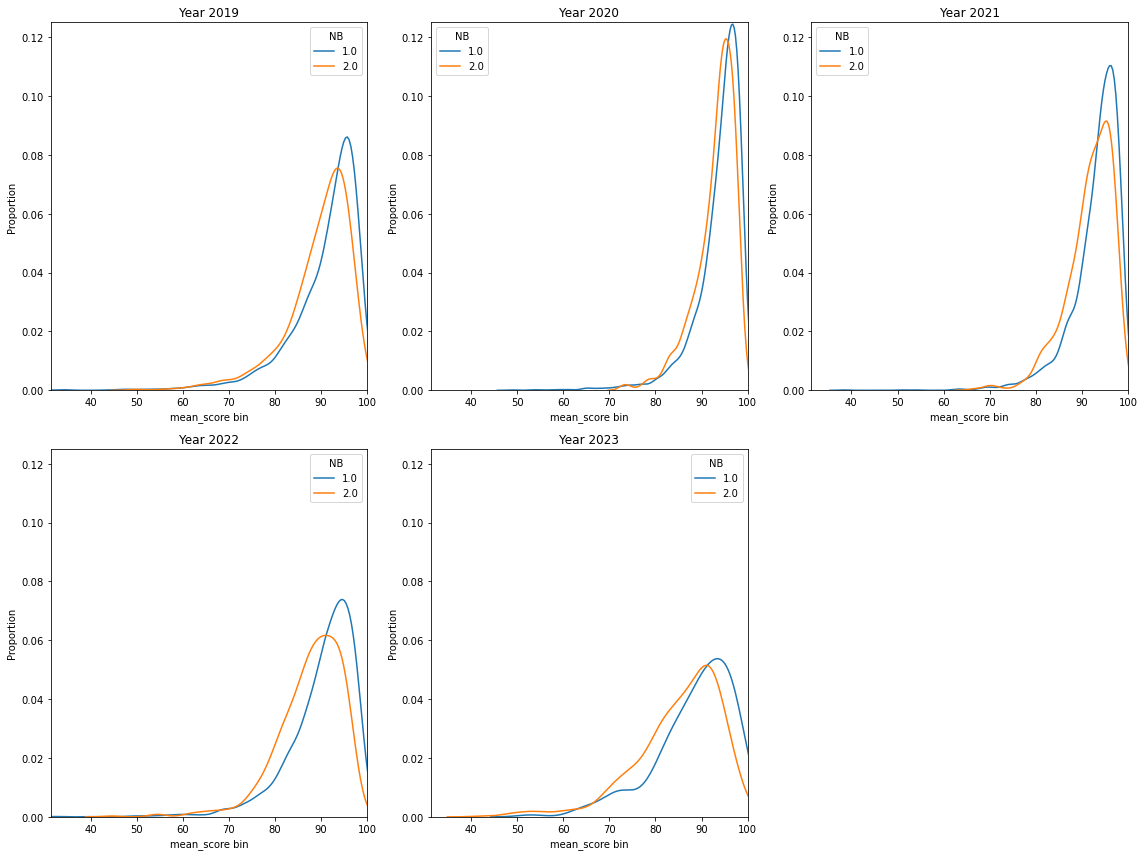

In [11]:
years = [2019, 2020, 2021, 2022, 2023]

# create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

# plot overlapping distplots for each year
for i, year in enumerate(years):
    for j, NB in enumerate(sorted(route_agg_scores['NB'].unique())):
        sns.distplot(route_agg_scores[(route_agg_scores['YEAR_DEP']==year) & (route_agg_scores['NB']==NB)]['mean_score'], hist=False, rug=False, kde=True, hist_kws={'histtype': 'step'}, label=NB, ax=axs[i//3, i%3])

    # set the x-axis limits and labels
    axs[i//3, i%3].set_xlim([route_agg_scores['mean_score'].min(), route_agg_scores['mean_score'].max()])
    axs[i//3, i%3].set_ylim([0, 0.125])
    axs[i//3, i%3].set_xlabel('mean_score bin')
    axs[i//3, i%3].set_ylabel('Proportion')
    axs[i//3, i%3].set_title(f'Year {year}')

    # add legend
    axs[i//3, i%3].legend(title='NB')

# adjust the spacing between subplots and display the plot
fig.delaxes(axs[1][2])
plt.tight_layout()
plt.show()

**Interpretation:** here we see the distribution of punctuality scores for both NB types, per year. We note that the reduction in travellers because of COVID-19 in 2020 translated into punctuality from brussels trains moving closer to other trains. In 2023 we see indications of second modes forming in the distribution. This may be too early to generalise, as 2023 is only halway over (w/ regards to seasonality and completeness).

## EDA on P train impacts

In [6]:
# read in justifications data
justifs = pd.read_csv("/Users/miek/Downloads/Studie P-treinen/Extract justifications.csv", sep = ";", encoding='latin-1')
justifs.head()

/var/folders/xh/tvsq17cn5c5f3xr3pqpf29_r0000gn/T/ipykernel_35019/995432416.py:2: DtypeWarning: Columns (28,30,34,35,37,38,39,40,41,42,43,50) have mixed types. Specify dtype option on import or set low_memory=False.
  justifs = pd.read_csv("/Users/miek/Downloads/Studie P-treinen/Extract justifications.csv", sep = ";", encoding='latin-1')


,REF_JUS_ID,IMPACTED_TRAIN_DEPARTURE_DT,IMPACTED_TRAIN_LABEL,REF_TOD_IMPACTED_TRAIN,PTCAR_NO,DISTURBANCE_DT,JUSTIFIED_DIFFERENTIAL_DELAY,DISTURBANCE_ID,REF_DOSSIER,REF_JUSTIFICATION_NO,...,type_nl2,groupe_fr2,groupe_nl2,justification_dt,DOSSIER_REF,PTR_PTCAR_NO,LIN_LIGN_ID,REF_LINE_NO,LINE_NUMBER,IDENTIFICATOR
0,26460201,26/09/2019,E1707,24192376,215,01:51.0,2,29864904,0,18574998,...,NaN,NaN,NaN,01:51.0,NaN,NaN,NaN,NaN,NaN,NaN
1,27027204,7/01/2020,EE9251,24786498,215,50:03.0,2,30965100,0,19303584,...,NaN,NaN,NaN,50:04.0,NaN,NaN,NaN,NaN,NaN,NaN
2,25381769,25/02/2019,EE1528,22936396,136,36:38.0,2,27776562,0,17190058,...,NaN,NaN,NaN,36:39.0,NaN,NaN,NaN,NaN,NaN,NaN
3,25492144,18/03/2019,E2304,23057298,215,28:47.0,2,27992088,0,17334611,...,NaN,NaN,NaN,28:47.0,NaN,NaN,NaN,NaN,NaN,NaN
4,26343649,5/09/2019,EE437,24062554,215,39:22.0,2,29641904,0,18427906,...,NaN,NaN,NaN,39:22.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
check_times_impacted = justifs.groupby('REF_TOD_IMPACTED_TRAIN').agg(count_resp_trnos=('trno_resp', 'size')).reset_index()
check_times_impacted

,REF_TOD_IMPACTED_TRAIN,count_resp_trnos
0,22626298,1
1,22626299,1
2,22626302,2
3,22626305,1
4,22626340,2
...,...,...
363053,32368896,1
363054,32375192,1
363055,32375355,1
363056,32399774,3


In [19]:
print(round(check_times_impacted['count_resp_trnos'].value_counts(normalize=True) * 100, 2))

count_resp_trnos
1     58.49
2     20.11
3      8.98
4      4.94
5      2.86
6      1.75
7      1.04
8      0.63
9      0.39
10     0.27
11     0.17
12     0.11
13     0.08
14     0.05
15     0.04
16     0.02
17     0.01
18     0.01
20     0.01
19     0.00
21     0.00
22     0.00
23     0.00
24     0.00
26     0.00
27     0.00
28     0.00
25     0.00
57     0.00
40     0.00
29     0.00
30     0.00
38     0.00
34     0.00
35     0.00
32     0.00
Name: proportion, dtype: float64


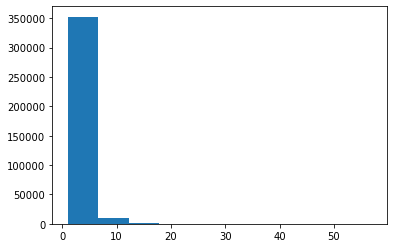

In [16]:
plt.hist(check_times_impacted['count_resp_trnos'])
plt.show()

In [7]:
justifs.columns

Index(['REF_JUS_ID', 'IMPACTED_TRAIN_DEPARTURE_DT', 'IMPACTED_TRAIN_LABEL',
       'REF_TOD_IMPACTED_TRAIN', 'PTCAR_NO', 'DISTURBANCE_DT',
       'JUSTIFIED_DIFFERENTIAL_DELAY', 'DISTURBANCE_ID', 'REF_DOSSIER',
       'REF_JUSTIFICATION_NO', 'DemandJustifyType', 'TRAIN_NUMBER', 'NAT_RGE',
       'DEPARTURE_DT', 'PassengerTrain', 'REF_OPE_NO', 'COMMERCIAL_TYPE',
       'LONG_NAME_NL', 'LONG_NAME_FR', 'GPS_LATITUDE', 'GPS_LONGITUDE',
       'DISTRICT_ID', 'DISTURB_TYPE_ID', 'type_fr', 'type_nl', 'groupe_fr',
       'groupe_nl', 'TRAIN_ID_resp', 'Libelle_resp', 'trno_resp',
       'nat_rge_resp', 'RSP_NB', 'rsp_nb2', 'Disturb_id2', 'DOSSIER_NO',
       'dossier_type2', 'master_dossier_ref2', 'ELEMENT', 'REPORT', 'DATUM',
       'type_fr2', 'type_nl2', 'groupe_fr2', 'groupe_nl2', 'justification_dt',
       'DOSSIER_REF', 'PTR_PTCAR_NO', 'LIN_LIGN_ID', 'REF_LINE_NO',
       'LINE_NUMBER', 'IDENTIFICATOR'],
      dtype='object')

In [26]:
justifs['TRAIN_ID_resp'].head()
#justifs['TRAIN_ID_resp'].head()


0    24196802.0
1    24788833.0
2    22940978.0
3    23058491.0
4    24065964.0
Name: TRAIN_ID_resp, dtype: float64

In [14]:

justifs_punct = pd.merge(justifs, all_punct, left_on = ['REF_TOD_IMPACTED_TRAIN', 'TRAIN_NUMBER'], right_on=['TRAIN_ID', 'TRAIN_NUMBER'], how = "left")
justifs_punct

,REF_JUS_ID,IMPACTED_TRAIN_DEPARTURE_DT,IMPACTED_TRAIN_LABEL,REF_TOD_IMPACTED_TRAIN,PTCAR_NO,DISTURBANCE_DT,JUSTIFIED_DIFFERENTIAL_DELAY,DISTURBANCE_ID,REF_DOSSIER,REF_JUSTIFICATION_NO,...,PTCAR_2pointage,NAT_RGE_y,Retard_1pointage_valeur,Retard_2pointage_valeur,Validite_1pointage,Validite_2pointage,NB,Score,ScorePonctu,YEAR_DEP
0,26460201,26/09/2019,E1707,24192376,215,01:51.0,2,29864904,0,18574998,...,220.0,,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2019.0
1,27027204,7/01/2020,EE9251,24786498,215,50:03.0,2,30965100,0,19303584,...,NaN,,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2020.0
2,25381769,25/02/2019,EE1528,22936396,136,36:38.0,2,27776562,0,17190058,...,221.0,,1.0,1.0,1.0,1.0,2.0,2.0,100.0,2019.0
3,25492144,18/03/2019,E2304,23057298,215,28:47.0,2,27992088,0,17334611,...,220.0,,1.0,1.0,1.0,1.0,2.0,2.0,100.0,2019.0
4,26343649,5/09/2019,EE437,24062554,215,39:22.0,2,29641904,0,18427906,...,221.0,,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710933,31090559,30/03/2022,E7487,30006983,269,56:13.0,1,39016220,39016220,24321451,...,NaN,,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2022.0
710934,31095073,30/03/2022,E4866,30006905,628,31:39.0,2,39025226,39024222,24327013,...,NaN,,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2022.0
710935,31094827,30/03/2022,E3687,30007943,505,05:52.0,1,39024720,39024222,24326685,...,221.0,,0.0,1.0,1.0,1.0,2.0,1.0,50.0,2022.0
710936,31080409,29/03/2022,E7362,29999779,1548,07:28.0,1,38997370,38995828,24309434,...,NaN,,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2022.0


In [15]:
# split in terms of 1 PTCAR or 2 PTCAR measurements
justifs_punct1 = justifs_punct[justifs_punct['Retard_2pointage'].isna()]
justifs_punct2 = justifs_punct[justifs_punct['Retard_2pointage'].notna()]

justifs_punct1 = justifs_punct1[justifs_punct1['Retard_1pointage'] > 0]
justifs_punct2 = justifs_punct2[(justifs_punct2['Retard_1pointage'] > 0) & (justifs_punct2['Retard_2pointage'] > 0)]

justifs_punct = pd.concat([justifs_punct1, justifs_punct2], axis = 0)
justifs_punct

,REF_JUS_ID,IMPACTED_TRAIN_DEPARTURE_DT,IMPACTED_TRAIN_LABEL,REF_TOD_IMPACTED_TRAIN,PTCAR_NO,DISTURBANCE_DT,JUSTIFIED_DIFFERENTIAL_DELAY,DISTURBANCE_ID,REF_DOSSIER,REF_JUSTIFICATION_NO,...,PTCAR_2pointage,NAT_RGE_y,Retard_1pointage_valeur,Retard_2pointage_valeur,Validite_1pointage,Validite_2pointage,NB,Score,ScorePonctu,YEAR_DEP
1,27027204,7/01/2020,EE9251,24786498,215,50:03.0,2,30965100,0,19303584,...,NaN,,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2020.0
12,25810911,16/05/2019,EE9251,23419474,215,50:00.0,2,28603036,0,17744867,...,NaN,,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019.0
24,25319291,12/02/2019,EE9255,22867120,215,53:14.0,2,27654110,0,17108882,...,NaN,,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2019.0
31,25732258,3/05/2019,E3308,23341303,215,36:58.0,2,28457502,0,17644600,...,NaN,,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2019.0
34,25976663,18/06/2019,E3107,23613156,215,04:54.0,2,28922868,0,17961140,...,NaN,,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710922,33496802,23/01/2023,E1533,31875714,8,38:16.0,2,43860396,0,27073993,...,221.0,,1.0,1.0,1.0,1.0,2.0,2.0,100.0,2023.0
710924,33239133,20/12/2022,EE528,31691382,127,00:10.0,1,43333738,0,26780314,...,221.0,,0.0,1.0,1.0,1.0,2.0,1.0,50.0,2022.0
710927,33476278,20/01/2023,EE1706,31859959,215,46:36.0,2,43817534,0,27049607,...,220.0,,0.0,1.0,1.0,1.0,2.0,1.0,50.0,2023.0
710935,31094827,30/03/2022,E3687,30007943,505,05:52.0,1,39024720,39024222,24326685,...,221.0,,0.0,1.0,1.0,1.0,2.0,1.0,50.0,2022.0


In [29]:
subset1.columns

Index(['REF_JUS_ID', 'IMPACTED_TRAIN_DEPARTURE_DT', 'IMPACTED_TRAIN_LABEL',
       'REF_TOD_IMPACTED_TRAIN', 'PTCAR_NO', 'DISTURBANCE_DT',
       'JUSTIFIED_DIFFERENTIAL_DELAY', 'DISTURBANCE_ID', 'REF_DOSSIER',
       'REF_JUSTIFICATION_NO', 'DemandJustifyType', 'TRAIN_NUMBER',
       'NAT_RGE_x', 'DEPARTURE_DT', 'PassengerTrain', 'REF_OPE_NO',
       'COMMERCIAL_TYPE', 'LONG_NAME_NL', 'LONG_NAME_FR', 'GPS_LATITUDE',
       'GPS_LONGITUDE', 'DISTRICT_ID', 'DISTURB_TYPE_ID', 'type_fr', 'type_nl',
       'groupe_fr', 'groupe_nl', 'TRAIN_ID_resp', 'Libelle_resp', 'trno_resp',
       'nat_rge_resp', 'RSP_NB', 'rsp_nb2', 'Disturb_id2', 'DOSSIER_NO',
       'dossier_type2', 'master_dossier_ref2', 'ELEMENT', 'REPORT', 'DATUM',
       'type_fr2', 'type_nl2', 'groupe_fr2', 'groupe_nl2', 'justification_dt',
       'DOSSIER_REF', 'PTR_PTCAR_NO', 'LIN_LIGN_ID', 'REF_LINE_NO',
       'LINE_NUMBER', 'IDENTIFICATOR', 'TRAIN_ID', 'DAT_DEP',
       'delay_of_interest', 'PTCAR_1pointage', 'PTCAR_2pointa

In [16]:
subset1 = justifs_punct[justifs_punct['NB'] == 1]
cat1 = subset1.rename(columns={"Retard_1pointage": "delay_of_interest", "Retard_2pointage": "redundant_delay"})
cat1['category'] = 1
cat1 = cat1.drop(columns = "redundant_delay")

subset2 = justifs_punct[justifs_punct['NB'] == 2]

cat2 = subset2.rename(columns={"Retard_1pointage": "delay_of_interest", "Retard_2pointage": "redundant_delay"})
cat2['category'] = 2
cat2 = cat2.drop(columns = "redundant_delay")

cat3 = subset2.rename(columns={"Retard_2pointage": "delay_of_interest", "Retard_1pointage": "redundant_delay"})
cat3['category'] = 3
cat3 = cat3.drop(columns = "redundant_delay")


justifs_punct = pd.concat([cat1, cat2, cat3])
justifs_punct

,REF_JUS_ID,IMPACTED_TRAIN_DEPARTURE_DT,IMPACTED_TRAIN_LABEL,REF_TOD_IMPACTED_TRAIN,PTCAR_NO,DISTURBANCE_DT,JUSTIFIED_DIFFERENTIAL_DELAY,DISTURBANCE_ID,REF_DOSSIER,REF_JUSTIFICATION_NO,...,NAT_RGE_y,Retard_1pointage_valeur,Retard_2pointage_valeur,Validite_1pointage,Validite_2pointage,NB,Score,ScorePonctu,YEAR_DEP,category
1,27027204,7/01/2020,EE9251,24786498,215,50:03.0,2,30965100,0,19303584,...,,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2020.0,1
12,25810911,16/05/2019,EE9251,23419474,215,50:00.0,2,28603036,0,17744867,...,,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019.0,1
24,25319291,12/02/2019,EE9255,22867120,215,53:14.0,2,27654110,0,17108882,...,,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2019.0,1
31,25732258,3/05/2019,E3308,23341303,215,36:58.0,2,28457502,0,17644600,...,,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2019.0,1
34,25976663,18/06/2019,E3107,23613156,215,04:54.0,2,28922868,0,17961140,...,,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710922,33496802,23/01/2023,E1533,31875714,8,38:16.0,2,43860396,0,27073993,...,,1.0,1.0,1.0,1.0,2.0,2.0,100.0,2023.0,3
710924,33239133,20/12/2022,EE528,31691382,127,00:10.0,1,43333738,0,26780314,...,,0.0,1.0,1.0,1.0,2.0,1.0,50.0,2022.0,3
710927,33476278,20/01/2023,EE1706,31859959,215,46:36.0,2,43817534,0,27049607,...,,0.0,1.0,1.0,1.0,2.0,1.0,50.0,2023.0,3
710935,31094827,30/03/2022,E3687,30007943,505,05:52.0,1,39024720,39024222,24326685,...,,0.0,1.0,1.0,1.0,2.0,1.0,50.0,2022.0,3


In [31]:
justifs_punct.columns

Index(['REF_JUS_ID', 'IMPACTED_TRAIN_DEPARTURE_DT', 'IMPACTED_TRAIN_LABEL',
       'REF_TOD_IMPACTED_TRAIN', 'PTCAR_NO', 'DISTURBANCE_DT',
       'JUSTIFIED_DIFFERENTIAL_DELAY', 'DISTURBANCE_ID', 'REF_DOSSIER',
       'REF_JUSTIFICATION_NO', 'DemandJustifyType', 'TRAIN_NUMBER',
       'NAT_RGE_x', 'DEPARTURE_DT', 'PassengerTrain', 'REF_OPE_NO',
       'COMMERCIAL_TYPE', 'LONG_NAME_NL', 'LONG_NAME_FR', 'GPS_LATITUDE',
       'GPS_LONGITUDE', 'DISTRICT_ID', 'DISTURB_TYPE_ID', 'type_fr', 'type_nl',
       'groupe_fr', 'groupe_nl', 'TRAIN_ID_resp', 'Libelle_resp', 'trno_resp',
       'nat_rge_resp', 'RSP_NB', 'rsp_nb2', 'Disturb_id2', 'DOSSIER_NO',
       'dossier_type2', 'master_dossier_ref2', 'ELEMENT', 'REPORT', 'DATUM',
       'type_fr2', 'type_nl2', 'groupe_fr2', 'groupe_nl2', 'justification_dt',
       'DOSSIER_REF', 'PTR_PTCAR_NO', 'LIN_LIGN_ID', 'REF_LINE_NO',
       'LINE_NUMBER', 'IDENTIFICATOR', 'TRAIN_ID', 'DAT_DEP',
       'delay_of_interest', 'PTCAR_1pointage', 'PTCAR_2pointa

In [17]:
trains_grouped_justifs_punct =justifs_punct.groupby(['trno_resp', 'TRAIN_ID_resp', 'YEAR_DEP', 'NB']).agg(impacted_count=('REF_JUS_ID', 'size'),
                                                                         total_impact=('delay_of_interest', 'sum'),
                                                                         avg_impact=('delay_of_interest', 'mean')).reset_index()
trains_grouped_justifs_punct
trains_grouped_justifs_punct['truncated_impacted_count'] = trains_grouped_justifs_punct['impacted_count'].apply(lambda x: x if x <  20 else 21)
p_trains_grouped_justifs_punct = trains_grouped_justifs_punct[(trains_grouped_justifs_punct['trno_resp'] >= 7000) &
                                                              (trains_grouped_justifs_punct['trno_resp'] <= 8999)]

normal_trains_grouped_justifs_punct = trains_grouped_justifs_punct[(trains_grouped_justifs_punct['trno_resp'] < 7000) |
                                                              (trains_grouped_justifs_punct['trno_resp'] > 8999)]
normal_trains_grouped_justifs_punct

## MAKE BELOW, need for comparing with P-trains
#peak_normal_trains_grouped_justifs_punct # Subset of normal trains that departed during peak hours

,trno_resp,TRAIN_ID_resp,YEAR_DEP,NB,impacted_count,total_impact,avg_impact,truncated_impacted_count
0,11.0,22758012.0,2019.0,2.0,2,2272.0,1136.000000,2
1,11.0,23035292.0,2019.0,1.0,1,181.0,181.000000,1
2,11.0,23064714.0,2019.0,2.0,2,341.0,170.500000,2
3,11.0,23552941.0,2019.0,1.0,1,1402.0,1402.000000,1
4,11.0,24283577.0,2019.0,2.0,2,1128.0,564.000000,2
...,...,...,...,...,...,...,...,...
239374,93116.0,28746300.0,2021.0,1.0,2,557.0,278.500000,2
239375,93144.0,31893495.0,2023.0,1.0,1,136.0,136.000000,1
239376,93144.0,31893613.0,2023.0,1.0,1,189.0,189.000000,1
239377,93302.0,29953902.0,2022.0,1.0,1,312.0,312.000000,1


In [67]:
trains_grouped_justifs_punct['truncated_impacted_count'].max()

21

In [68]:
p_trains_grouped_justifs_punct

,trno_resp,TRAIN_ID_resp,YEAR_DEP,NB,impacted_count,total_impact,avg_impact,truncated_impacted_count
114428,7001.0,22650991.0,2019.0,1.0,1,359.0,359.0,1
114429,7001.0,22650991.0,2019.0,2.0,4,850.0,212.5,4
114430,7001.0,22660190.0,2019.0,1.0,1,350.0,350.0,1
114431,7001.0,22672413.0,2019.0,2.0,2,463.0,231.5,2
114432,7001.0,22676071.0,2019.0,2.0,2,579.0,289.5,2
...,...,...,...,...,...,...,...,...
232901,8999.0,32219473.0,2023.0,1.0,1,18.0,18.0,1
232902,8999.0,32228652.0,2023.0,1.0,1,432.0,432.0,1
232903,8999.0,32264437.0,2023.0,2.0,6,4353.0,725.5,6
232904,8999.0,32270710.0,2023.0,2.0,4,546.0,136.5,4


/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


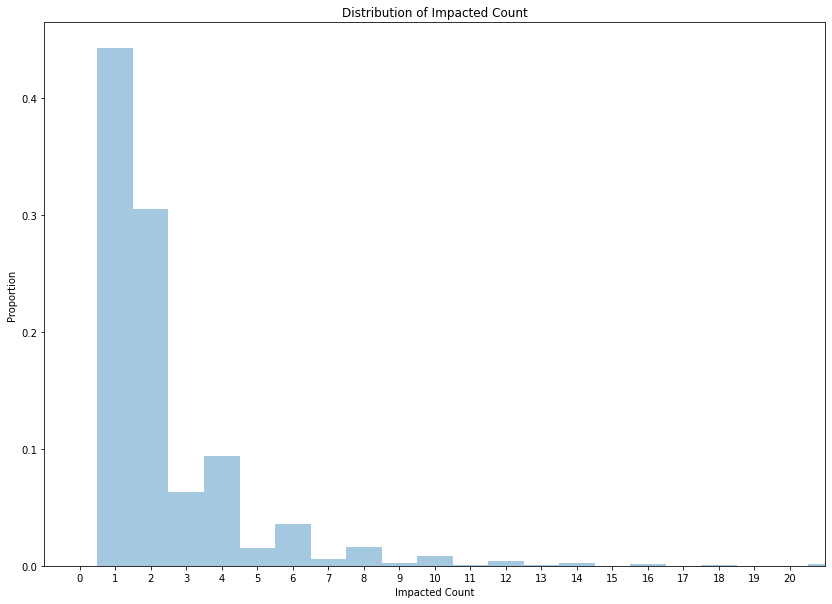

In [18]:
# create a list of labels from 0 to 21
labels = [str(i) if i < 21 else '21+' for i in range(0, 22)]

plt.figure(figsize=(14, 10))
sns.distplot(a=p_trains_grouped_justifs_punct["truncated_impacted_count"], bins=np.arange(0, 23), kde=False, norm_hist=True)
plt.xticks(np.arange(0.5, 21.5), labels[:-1], ha='center')  # set the xticks with the labels
plt.title("Distribution of Impacted Count")
plt.xlabel("Impacted Count")
plt.ylabel("Proportion")  # set the y-axis label to "Proportion"
plt.xlim(-0.5, 21.5)  # adjust the x-axis limits to include the last bin
plt.show()

710.0
2486.0
326.0
1224.0


/var/folders/xh/tvsq17cn5c5f3xr3pqpf29_r0000gn/T/ipykernel_85490/3391769094.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trains_grouped_justifs_punct['total_impact'][trains_grouped_justifs_punct['total_impact'] > max_allowed_total_impact] = max_allowed_total_impact
/var/folders/xh/tvsq17cn5c5f3xr3pqpf29_r0000gn/T/ipykernel_85490/3391769094.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trains_grouped_justifs_punct['avg_impact'][trains_grouped_justifs_punct['avg_impact'] > max_allowed_avg_impact] = max_allowed_avg_impact


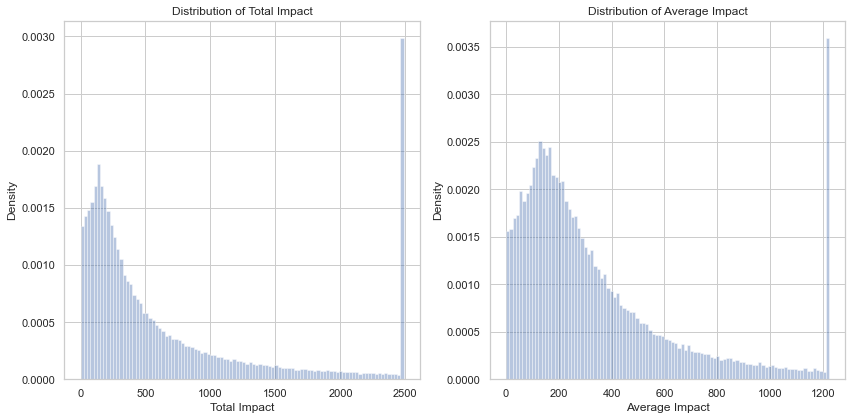

In [70]:
#calculate interquartile range and max allowed values for total impact and average impact 
q3_total_impact, q1_total_impact = np.percentile(trains_grouped_justifs_punct['total_impact'], [75 ,25])
iqr_total_impact = q3_total_impact - q1_total_impact
print(iqr_total_impact)
max_allowed_total_impact = np.median(trains_grouped_justifs_punct['total_impact']) + 3 * iqr_total_impact
print(max_allowed_total_impact)

q3_avg_impact, q1_avg_impact = np.percentile(trains_grouped_justifs_punct['avg_impact'], [75 ,25])
iqr_avg_impact = q3_avg_impact - q1_avg_impact
print(iqr_avg_impact)
max_allowed_avg_impact = np.median(trains_grouped_justifs_punct['avg_impact']) + 3 * iqr_avg_impact
print(max_allowed_avg_impact)

# replace outliers with max allowed values
trains_grouped_justifs_punct['total_impact'][trains_grouped_justifs_punct['total_impact'] > max_allowed_total_impact] = max_allowed_total_impact
trains_grouped_justifs_punct['avg_impact'][trains_grouped_justifs_punct['avg_impact'] > max_allowed_avg_impact] = max_allowed_avg_impact

# create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# create the distribution plot for total impact on ax1
sns.distplot(a=trains_grouped_justifs_punct["total_impact"], bins=100, ax=ax1, kde=False, norm_hist=True)
ax1.set_title("Distribution of Total Impact")
ax1.set_xlabel("Total Impact")
ax1.set_ylabel("Density")

# create the distribution plot for average impact on ax2
sns.distplot(a=trains_grouped_justifs_punct["avg_impact"], bins=100, ax=ax2, kde=False, norm_hist=True)
ax2.set_title("Distribution of Average Impact")
ax2.set_xlabel("Average Impact")
ax2.set_ylabel("Density")

# adjust the space between subplots
fig.tight_layout()

# show the plot
plt.show()

In [72]:
trains_grouped_justifs_punct

,trno_resp,TRAIN_ID_resp,YEAR_DEP,NB,impacted_count,total_impact,avg_impact,truncated_impacted_count
114428,7001.0,22650991.0,2019.0,1.0,1,359.0,359.0,1
114429,7001.0,22650991.0,2019.0,2.0,4,850.0,212.5,4
114430,7001.0,22660190.0,2019.0,1.0,1,350.0,350.0,1
114431,7001.0,22672413.0,2019.0,2.0,2,463.0,231.5,2
114432,7001.0,22676071.0,2019.0,2.0,2,579.0,289.5,2
...,...,...,...,...,...,...,...,...
232901,8999.0,32219473.0,2023.0,1.0,1,18.0,18.0,1
232902,8999.0,32228652.0,2023.0,1.0,1,432.0,432.0,1
232903,8999.0,32264437.0,2023.0,2.0,6,4353.0,725.5,6
232904,8999.0,32270710.0,2023.0,2.0,4,546.0,136.5,4


**Interpretation:** of all P-trains that cause delays, this is the distribution of total and average delays caused

In [37]:
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(p_trains_grouped_justifs_punct.describe())



       trno_resp  TRAIN_ID_resp  impacted_count  total_impact  avg_impact  \
count     104358         104358          104358        104358      104358   
mean        8014       27238560               3          1162         371   
std          589        3037224               3          2334         433   
min         7001       22626375               1             1           1   
25%         7600       24432872               1           179         132   
50%         8002       27099301               2           445         247   
75%         8574       30000326               3          1204         455   
max         8999       32399900              57        118095       25093   

       truncated_impacted_count  
count                    104358  
mean                          3  
std                           3  
min                           1  
25%                           1  
50%                           2  
75%                           3  
max                          21  


/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

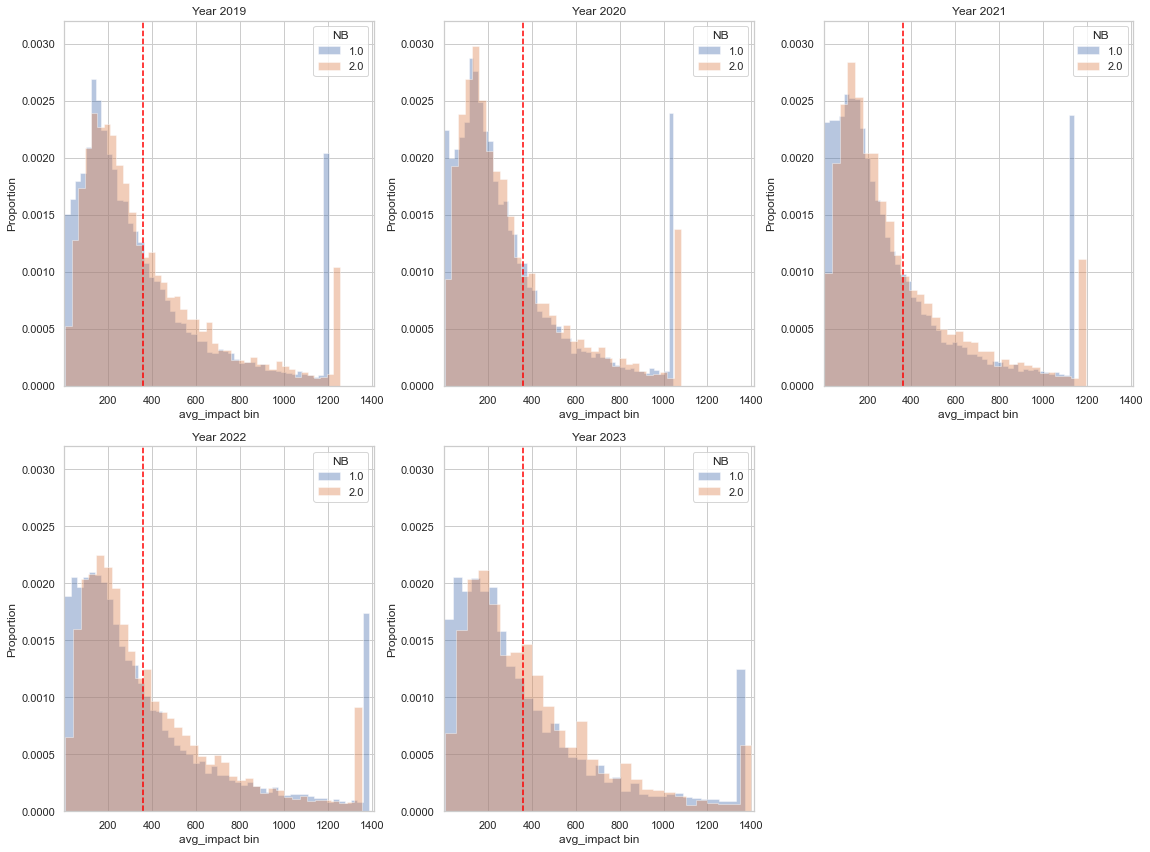

Year 2019, NB=1:
Proportion above 360: 34%
Year 2019, NB=2:
Proportion above 360: 37%
Year 2020, NB=1:
Proportion above 360: 28%
Year 2020, NB=2:
Proportion above 360: 30%
Year 2021, NB=1:
Proportion above 360: 30%
Year 2021, NB=2:
Proportion above 360: 32%
Year 2022, NB=1:
Proportion above 360: 37%
Year 2022, NB=2:
Proportion above 360: 40%
Year 2023, NB=1:
Proportion above 360: 37%
Year 2023, NB=2:
Proportion above 360: 44%


In [178]:
# plot distribution of average impact of P-trains per year

years = [2019, 2020, 2021, 2022, 2023]

# create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

# plot overlapping distplots for each year
for i, year in enumerate(years):
    for j, NB in enumerate(sorted(p_trains_grouped_justifs_punct['NB'].unique())):

        # calculate the upper bound for truncation
        q3_avg_impact, q1_avg_impact = np.percentile(p_trains_grouped_justifs_punct[(p_trains_grouped_justifs_punct['YEAR_DEP']==year) & (p_trains_grouped_justifs_punct['NB']==NB)]['avg_impact'], [75 ,25])
        iqr_avg_impact = q3_avg_impact - q1_avg_impact
        max_allowed_avg_impact = np.median(p_trains_grouped_justifs_punct[(p_trains_grouped_justifs_punct['YEAR_DEP']==year) & (p_trains_grouped_justifs_punct['NB']==NB)]['avg_impact']) + 3 * iqr_avg_impact

        # truncate the outlier values
        p_trains_grouped_justifs_punct.loc[(p_trains_grouped_justifs_punct['YEAR_DEP']==year) & (p_trains_grouped_justifs_punct['NB']==NB) & (p_trains_grouped_justifs_punct['avg_impact'] > max_allowed_avg_impact), 'avg_impact'] = max_allowed_avg_impact

        sns.distplot(p_trains_grouped_justifs_punct[(p_trains_grouped_justifs_punct['YEAR_DEP']==year) & (p_trains_grouped_justifs_punct['NB']==NB)]['avg_impact'],
                     hist=True,
                     norm_hist=True,
                     rug=False,
                     kde=False,
                     hist_kws={'histtype': 'stepfilled'}, # {'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
                     label=NB,
                     ax=axs[i//3, i%3])

    # set the x-axis limits and labels
    axs[i//3, i%3].set_xlim([p_trains_grouped_justifs_punct['avg_impact'].min(), 1410])
    axs[i//3, i%3].axvline(x=360, color='red', linestyle='--')
    axs[i//3, i%3].set_ylim([0, 0.0032])
    axs[i//3, i%3].set_xlabel('avg_impact bin')
    axs[i//3, i%3].set_ylabel('Proportion')
    axs[i//3, i%3].set_title(f'Year {year}')

    # add legend
    axs[i//3, i%3].legend(title='NB')

# adjust the spacing between subplots and display the plot
fig.delaxes(axs[1][2])
plt.tight_layout()
plt.show()

for year in years:
    for nb in [1, 2]:
        year_data = p_trains_grouped_justifs_punct[(p_trains_grouped_justifs_punct['YEAR_DEP'] == year) & (p_trains_grouped_justifs_punct['NB'] == nb)]
        total_count = len(year_data)
        above_360_count = len(year_data[year_data['avg_impact'] > 360])
        below_360_count = len(year_data[year_data['avg_impact'] < 360])

        above_360_prop = above_360_count / total_count * 100
        below_360_prop = below_360_count / total_count * 100

        print(f"Year {year}, NB={nb}:")
        print(f"Proportion above 360: {above_360_prop:.0f}%")
        #print(f"Proportion below 360: {below_360_prop:.0f}%")

/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

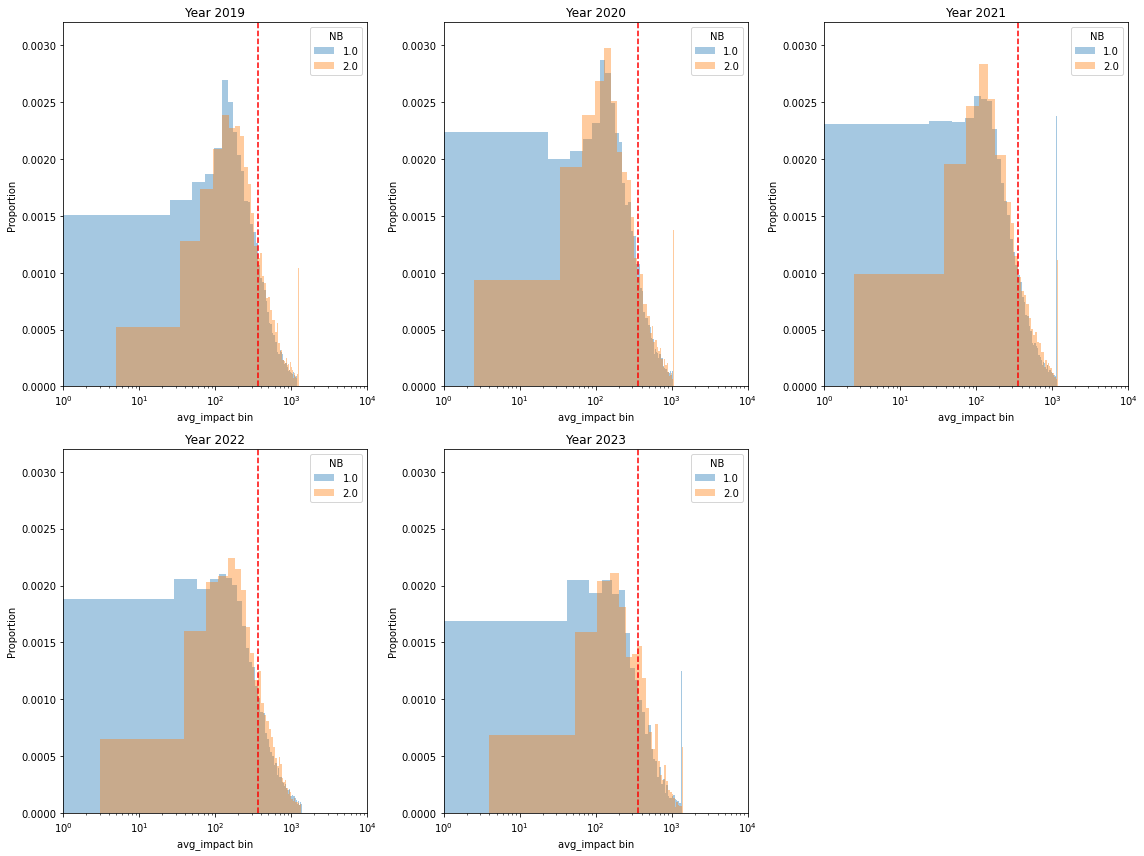

Year 2019, NB=1:
Proportion above 360: 34%
Year 2019, NB=2:
Proportion above 360: 37%
Year 2020, NB=1:
Proportion above 360: 28%
Year 2020, NB=2:
Proportion above 360: 30%
Year 2021, NB=1:
Proportion above 360: 30%
Year 2021, NB=2:
Proportion above 360: 32%
Year 2022, NB=1:
Proportion above 360: 37%
Year 2022, NB=2:
Proportion above 360: 40%
Year 2023, NB=1:
Proportion above 360: 37%
Year 2023, NB=2:
Proportion above 360: 44%


In [19]:
# LOG-transformed
# plot distribution of average impact of P-trains per year

years = [2019, 2020, 2021, 2022, 2023]

# create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

# plot overlapping distplots for each year
for i, year in enumerate(years):
    for j, NB in enumerate(sorted(p_trains_grouped_justifs_punct['NB'].unique())):

        # calculate the upper bound for truncation
        q3_avg_impact, q1_avg_impact = np.percentile(p_trains_grouped_justifs_punct[(p_trains_grouped_justifs_punct['YEAR_DEP']==year) & (p_trains_grouped_justifs_punct['NB']==NB)]['avg_impact'], [75 ,25])
        iqr_avg_impact = q3_avg_impact - q1_avg_impact
        max_allowed_avg_impact = np.median(p_trains_grouped_justifs_punct[(p_trains_grouped_justifs_punct['YEAR_DEP']==year) & (p_trains_grouped_justifs_punct['NB']==NB)]['avg_impact']) + 3 * iqr_avg_impact

        # truncate the outlier values
        p_trains_grouped_justifs_punct.loc[(p_trains_grouped_justifs_punct['YEAR_DEP']==year) & (p_trains_grouped_justifs_punct['NB']==NB) & (p_trains_grouped_justifs_punct['avg_impact'] > max_allowed_avg_impact), 'avg_impact'] = max_allowed_avg_impact

        sns.distplot(p_trains_grouped_justifs_punct[(p_trains_grouped_justifs_punct['YEAR_DEP']==year) & (p_trains_grouped_justifs_punct['NB']==NB)]['avg_impact'],
                     hist=True,
                     norm_hist=True,
                     rug=False,
                     kde=False,
                     hist_kws={'histtype': 'stepfilled'}, # {'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
                     label=NB,
                     ax=axs[i//3, i%3])

    # set the x-axis limits and labels
    axs[i//3, i%3].set_xscale('log')
    axs[i//3, i%3].set_xlim([p_trains_grouped_justifs_punct['avg_impact'].min(), 10000])
    axs[i//3, i%3].axvline(x=360, color='red', linestyle='--')
    axs[i//3, i%3].set_ylim([0, 0.0032])
    axs[i//3, i%3].set_xlabel('avg_impact bin')
    axs[i//3, i%3].set_ylabel('Proportion')
    axs[i//3, i%3].set_title(f'Year {year}')

    # add legend
    axs[i//3, i%3].legend(title='NB')

# adjust the spacing between subplots and display the plot
fig.delaxes(axs[1][2])
plt.tight_layout()
plt.show()

for year in years:
    for nb in [1, 2]:
        year_data = p_trains_grouped_justifs_punct[(p_trains_grouped_justifs_punct['YEAR_DEP'] == year) & (p_trains_grouped_justifs_punct['NB'] == nb)]
        total_count = len(year_data)
        above_360_count = len(year_data[year_data['avg_impact'] > 360])
        below_360_count = len(year_data[year_data['avg_impact'] < 360])

        above_360_prop = above_360_count / total_count * 100
        below_360_prop = below_360_count / total_count * 100

        print(f"Year {year}, NB={nb}:")
        print(f"Proportion above 360: {above_360_prop:.0f}%")
        #print(f"Proportion below 360: {below_360_prop:.0f}%")

/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

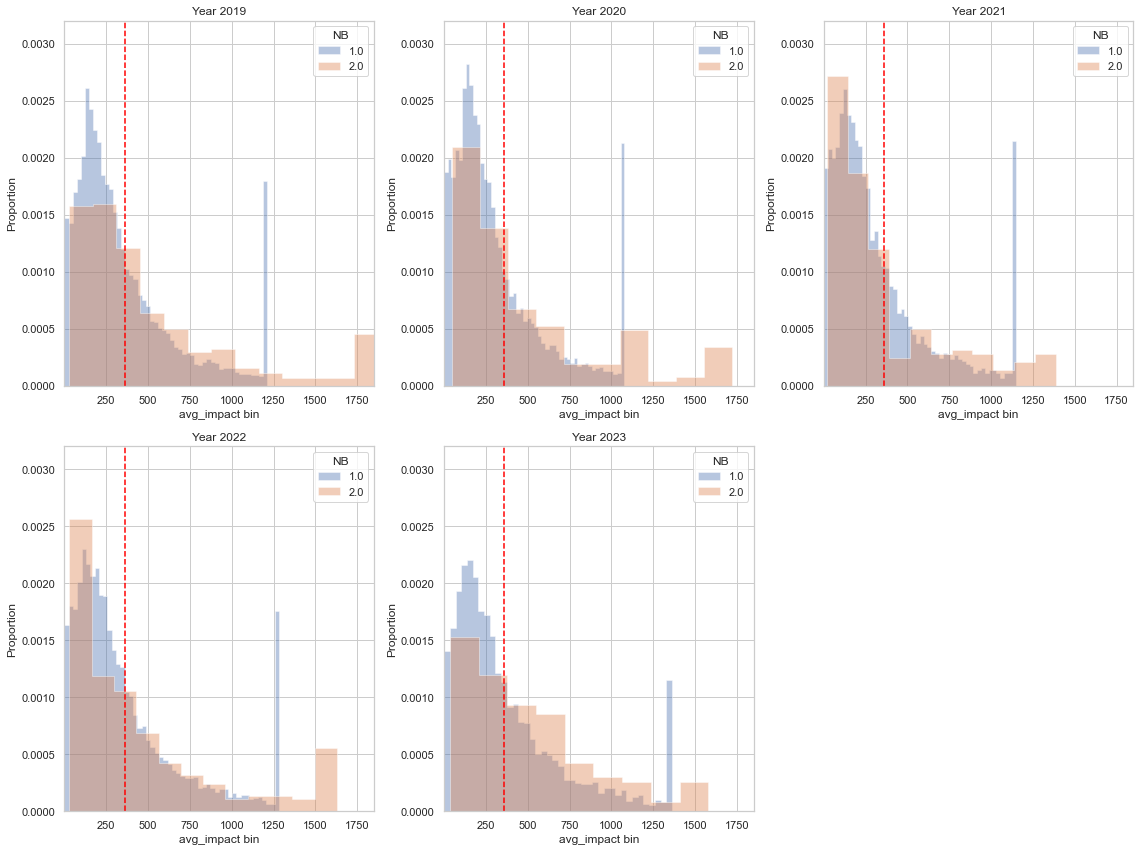

Year 2019, NB=1:
Proportion above 360: 34%
Year 2019, NB=2:
Proportion above 360: 51%
Year 2020, NB=1:
Proportion above 360: 29%
Year 2020, NB=2:
Proportion above 360: 42%
Year 2021, NB=1:
Proportion above 360: 31%
Year 2021, NB=2:
Proportion above 360: 31%
Year 2022, NB=1:
Proportion above 360: 35%
Year 2022, NB=2:
Proportion above 360: 44%
Year 2023, NB=1:
Proportion above 360: 38%
Year 2023, NB=2:
Proportion above 360: 54%


In [183]:
# plot distribution of average impact of NORMAL trains per year
##### We need to know when the trains left in order to be comparable to P-trains (now it's from the whole day)

years = [2019, 2020, 2021, 2022, 2023]

# create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

# plot overlapping distplots for each year
for i, year in enumerate(years):
    for j, NB in enumerate(sorted(normal_trains_grouped_justifs_punct['NB'].unique())):

        # calculate the upper bound for truncation
        q3_avg_impact, q1_avg_impact = np.percentile(normal_trains_grouped_justifs_punct[(normal_trains_grouped_justifs_punct['YEAR_DEP']==year) & (normal_trains_grouped_justifs_punct['NB']==NB)]['avg_impact'], [75 ,25])
        iqr_avg_impact = q3_avg_impact - q1_avg_impact
        max_allowed_avg_impact = np.median(normal_trains_grouped_justifs_punct[(normal_trains_grouped_justifs_punct['YEAR_DEP']==year) & (normal_trains_grouped_justifs_punct['NB']==NB)]['avg_impact']) + 3 * iqr_avg_impact

        # truncate the outlier values
        normal_trains_grouped_justifs_punct.loc[(normal_trains_grouped_justifs_punct['YEAR_DEP']==year) & (normal_trains_grouped_justifs_punct['NB']==NB) & (normal_trains_grouped_justifs_punct['avg_impact'] > max_allowed_avg_impact), 'avg_impact'] = max_allowed_avg_impact

        sns.distplot(normal_trains_grouped_justifs_punct[(normal_trains_grouped_justifs_punct['YEAR_DEP']==year) & (normal_trains_grouped_justifs_punct['NB']==NB)]['avg_impact'],
                     hist=True,
                     norm_hist=True,
                     rug=False,
                     kde=False,
                     hist_kws={'histtype': 'stepfilled'}, # {'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
                     label=NB,
                     ax=axs[i//3, i%3])

    # set the x-axis limits and labels
    axs[i//3, i%3].set_xlim([normal_trains_grouped_justifs_punct['avg_impact'].min(), 1850])
    axs[i//3, i%3].axvline(x=360, color='red', linestyle='--')
    axs[i//3, i%3].set_ylim([0, 0.0032])
    axs[i//3, i%3].set_xlabel('avg_impact bin')
    axs[i//3, i%3].set_ylabel('Proportion')
    axs[i//3, i%3].set_title(f'Year {year}')

    # add legend
    axs[i//3, i%3].legend(title='NB')

# adjust the spacing between subplots and display the plot
fig.delaxes(axs[1][2])
plt.tight_layout()
plt.show()

for year in years:
    for nb in [1, 2]:
        year_data = normal_trains_grouped_justifs_punct[(normal_trains_grouped_justifs_punct['YEAR_DEP'] == year) & (normal_trains_grouped_justifs_punct['NB'] == nb)]
        total_count = len(year_data)
        above_360_count = len(year_data[year_data['avg_impact'] > 360])
        below_360_count = len(year_data[year_data['avg_impact'] < 360])

        above_360_prop = above_360_count / total_count * 100
        below_360_prop = below_360_count / total_count * 100

        print(f"Year {year}, NB={nb}:")
        print(f"Proportion above 360: {above_360_prop:.0f}%")
        #print(f"Proportion below 360: {below_360_prop:.0f}%")


/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

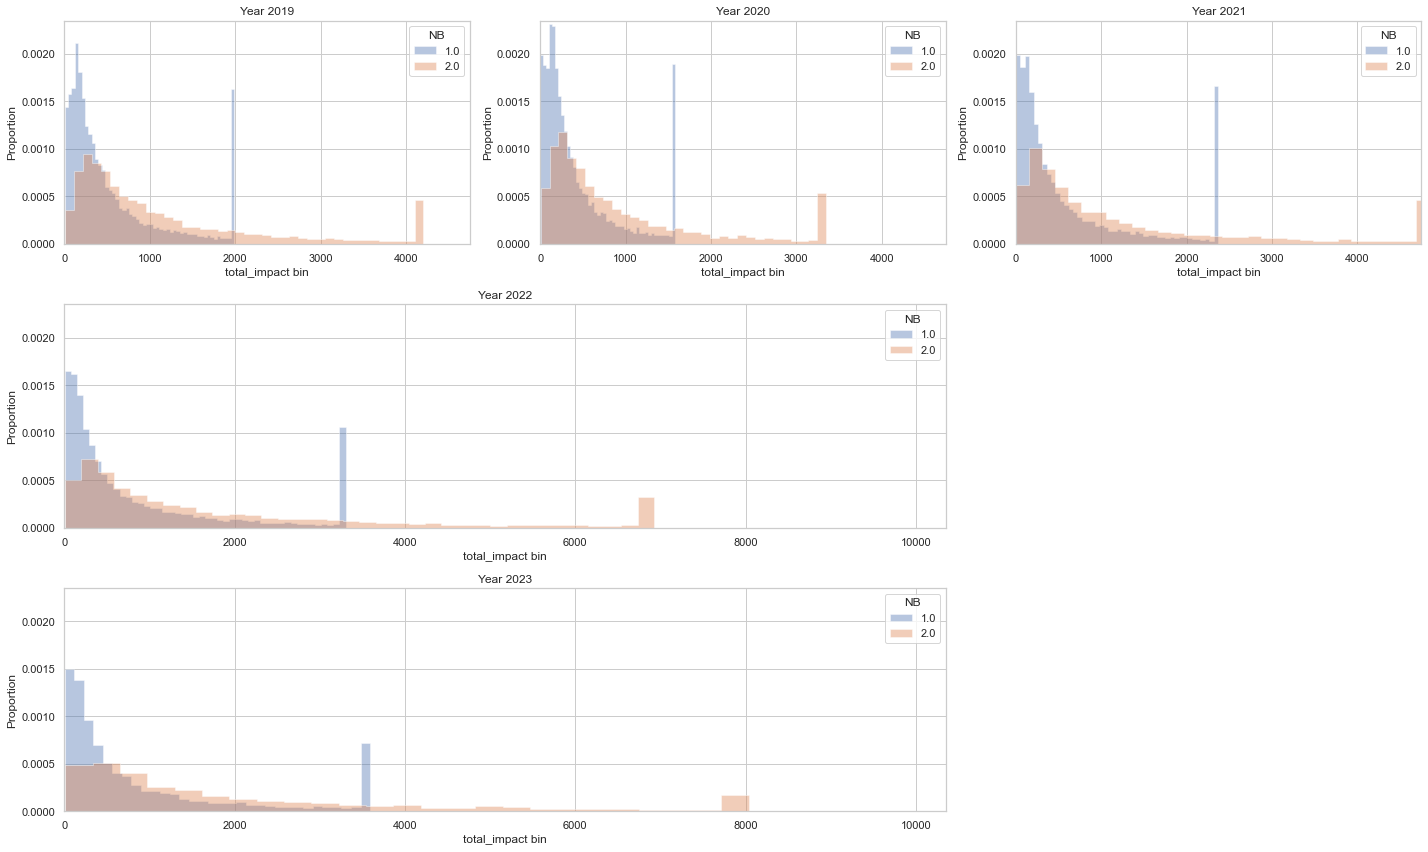

In [171]:
# plot distribution of total impact of P-trains per year

years = [2019, 2020, 2021, 2022, 2023]

# create subplots using subplot_mosaic
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[0, 2]),
       fig.add_subplot(gs[1, 0:2]),
       fig.add_subplot(gs[2, 0:2])]

# adjust the height space between subplots
fig.subplots_adjust(hspace=0.1)

# plot overlapping distplots for each year
for i, year in enumerate(years):
    for j, NB in enumerate(sorted(p_trains_grouped_justifs_punct['NB'].unique())):

        # calculate the upper bound for truncation
        q3_avg_impact, q1_avg_impact = np.percentile(p_trains_grouped_justifs_punct[(p_trains_grouped_justifs_punct['YEAR_DEP']==year) & (p_trains_grouped_justifs_punct['NB']==NB)]['total_impact'], [75 ,25])
        iqr_avg_impact = q3_avg_impact - q1_avg_impact
        max_allowed_avg_impact = np.median(p_trains_grouped_justifs_punct[(p_trains_grouped_justifs_punct['YEAR_DEP']==year) & (p_trains_grouped_justifs_punct['NB']==NB)]['total_impact']) + 3 * iqr_avg_impact

        # truncate the outlier values
        p_trains_grouped_justifs_punct.loc[(p_trains_grouped_justifs_punct['YEAR_DEP']==year) & (p_trains_grouped_justifs_punct['NB']==NB) & (p_trains_grouped_justifs_punct['total_impact'] > max_allowed_avg_impact), 'total_impact'] = max_allowed_avg_impact

        # set the xlim for the appropriate plots
        if i < 3:
            xlim = [0, 4750]
        else:
            xlim = [0, 10350]

        sns.distplot(p_trains_grouped_justifs_punct[(p_trains_grouped_justifs_punct['YEAR_DEP']==year) & (p_trains_grouped_justifs_punct['NB']==NB)]['total_impact'],
                     hist=True,
                     norm_hist=True,
                     rug=False,
                     kde=False,
                     hist_kws={'histtype': 'stepfilled'}, # {'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
                     label=NB,
                     ax=axs[i])

    # set the x-axis limits and labels
    axs[i].set_xlim(xlim)
    axs[i].set_ylim([0, 0.00235])
    axs[i].set_xlabel('total_impact bin')
    axs[i].set_ylabel('Proportion')
    axs[i].set_title(f'Year {year}')

    # add legend
    axs[i].legend(title='NB')

# adjust the spacing between subplots and display the plot
fig.tight_layout()
plt.show()

## **Intepretation:** we made this graph to compare 2022 and 2023 more specifically to 2019 (last pre-corona year). We see that in general the distribution of total impact of P-trains has more variance for both Brussels and non-Brussels P-trains.

### non-Brussels trains evolution:
The mean, average and deviations seem to have deteriorated for the non-brussels trains. Only the mode has improved (more observations closer to 0).
With regards to outliers, they are less common than before 2019 (~1% compared to 1.5% before) but they are more severe (higher total impact). This can just be because the higher variance caused a higher cutoff value and thus less trains are truncated.

### Brussels trains evolution:
The variance in total impact of Brussels trains has gotten worse by around 50 and 100% in 2022 and 2023 compared to 2019. Unlike the non-Brussels trains, the proportion of outliers seems not to decrease proportionally with the increased variance. We went from 0.4% in 2019 to 0.35 and 0.25% in 2022.

/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

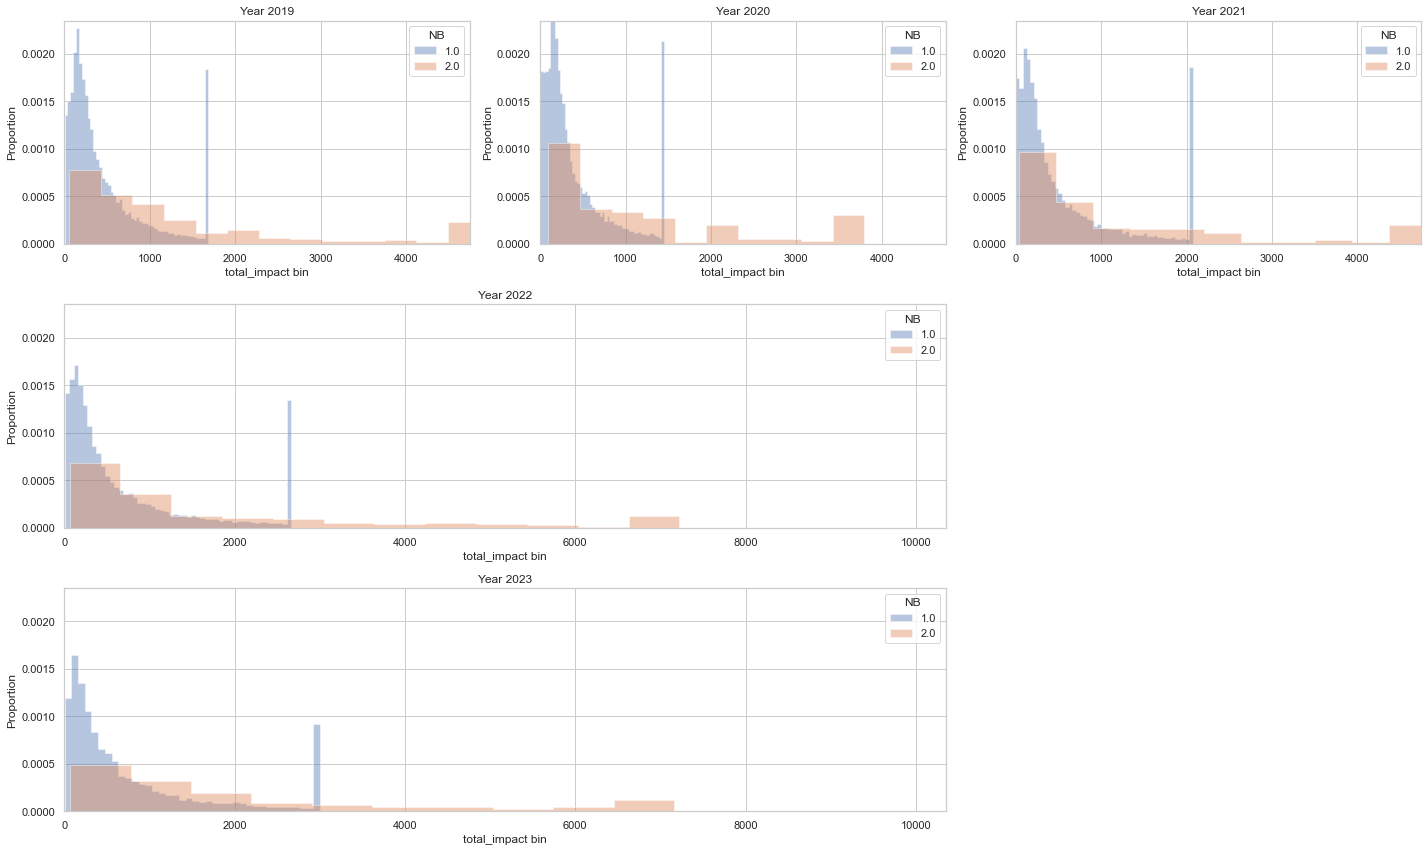

In [186]:
# plot distribution of total impact of NORMAL trains per year
##### We need to know when the trains left in order to be comparable to P-trains (now it's from the whole day)

years = [2019, 2020, 2021, 2022, 2023]

# create subplots using subplot_mosaic
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[0, 2]),
       fig.add_subplot(gs[1, 0:2]),
       fig.add_subplot(gs[2, 0:2])]

# adjust the height space between subplots
fig.subplots_adjust(hspace=0.1)

# plot overlapping distplots for each year
for i, year in enumerate(years):
    for j, NB in enumerate(sorted(normal_trains_grouped_justifs_punct['NB'].unique())):

        # calculate the upper bound for truncation
        q3_avg_impact, q1_avg_impact = np.percentile(normal_trains_grouped_justifs_punct[(normal_trains_grouped_justifs_punct['YEAR_DEP']==year) & (normal_trains_grouped_justifs_punct['NB']==NB)]['total_impact'], [75 ,25])
        iqr_avg_impact = q3_avg_impact - q1_avg_impact
        max_allowed_avg_impact = np.median(normal_trains_grouped_justifs_punct[(normal_trains_grouped_justifs_punct['YEAR_DEP']==year) & (normal_trains_grouped_justifs_punct['NB']==NB)]['total_impact']) + 3 * iqr_avg_impact

        # truncate the outlier values
        normal_trains_grouped_justifs_punct.loc[(normal_trains_grouped_justifs_punct['YEAR_DEP']==year) & (normal_trains_grouped_justifs_punct['NB']==NB) & (normal_trains_grouped_justifs_punct['total_impact'] > max_allowed_avg_impact), 'total_impact'] = max_allowed_avg_impact

        # set the xlim for the appropriate plots
        if i < 3:
            xlim = [0, 4750]
        else:
            xlim = [0, 10350]

        sns.distplot(normal_trains_grouped_justifs_punct[(normal_trains_grouped_justifs_punct['YEAR_DEP']==year) & (normal_trains_grouped_justifs_punct['NB']==NB)]['total_impact'],
                     hist=True,
                     norm_hist=True,
                     rug=False,
                     kde=False,
                     hist_kws={'histtype': 'stepfilled'}, # {'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
                     label=NB,
                     ax=axs[i])

    # set the x-axis limits and labels
    axs[i].set_xlim(xlim)
    axs[i].set_ylim([0, 0.00235])
    axs[i].set_xlabel('total_impact bin')
    axs[i].set_ylabel('Proportion')
    axs[i].set_title(f'Year {year}')

    # add legend
    axs[i].legend(title='NB')

# adjust the spacing between subplots and display the plot
fig.tight_layout()
plt.show()

